In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.pyplot import imshow
import warnings
warnings.filterwarnings('ignore')

In [2]:
shapes_arr = ["circle-750.0", "triangle-900.0", "triangle_inverted-1220.0", "diamond-600.0", "diamond-915.0", "square-600.0", "rect-458.0-610.0", "rect-762.0-915.0", "rect-915.0-1220.0", "pentagon-915.0", "octagon-915.0"]

CONFIDENCE_LEVEL = 0.403


In [3]:
MAPILLARY_LABEL_COUNTS_DICT = {
    "circle-750.0": 18144,
    "triangle-900.0": 1473,
    "triangle_inverted-1220.0": 1961,
    "diamond-600.0": 1107,
    "diamond-915.0": 3539,
    "square-600.0": 1898,
    "rect-458.0-610.0": 1580,
    "rect-762.0-915.0": 839,
    "rect-915.0-1220.0": 638,
    "pentagon-915.0": 204,
    "octagon-915.0": 1001,
    "other-0.0-0.0": 60104,
}
MAPILLARY_TOTAL_LABEL_COUNTS = sum(MAPILLARY_LABEL_COUNTS_DICT.values())
MAPILLARY_NON_OTHER_LABEL_COUNTS = MAPILLARY_TOTAL_LABEL_COUNTS - MAPILLARY_LABEL_COUNTS_DICT["other-0.0-0.0"]
MAPILLARY_NON_OTHER_LABEL_COUNTS

32384

## Synthetic/Synthetic Attacks

In [4]:
# baseline fnr results
# results_df = pd.read_csv('../runs/paper_results/synthetic_obj_size_ablation/baseline/patch_dim_64/results.csv')
no_attack_results = pd.DataFrame()
no_attack_results['class'] = shapes_arr

for color_intensity in [0.05, 0.10, 0.15, 0.20, 0.25]:
    try:
        results_df = pd.read_csv(f'../runs/paper_results_new/ablation_synthetic_jitter/baseline_jitter_intensity_{color_intensity:.2f}/results.csv')
        no_attack_results[f'fnr_color_intensity_{color_intensity}'] = results_df['fnr_synthetic'].values
    except:
        pass
no_attack_results

,class,fnr_color_intensity_0.05,fnr_color_intensity_0.1,fnr_color_intensity_0.15,fnr_color_intensity_0.2,fnr_color_intensity_0.25
0,circle-750.0,0.055650,0.055355,0.055384,0.056202,0.056831
1,triangle-900.0,0.087160,0.090236,0.092977,0.097456,0.100865
2,triangle_inverted-1220.0,0.277123,0.272920,0.265869,0.260328,0.257380
3,diamond-600.0,0.055363,0.056288,0.061374,0.064443,0.068656
4,diamond-915.0,0.296304,0.291830,0.286934,0.281032,0.274493
5,square-600.0,0.023332,0.023431,0.023425,0.023361,0.023344
6,rect-458.0-610.0,0.109497,0.108914,0.108733,0.108210,0.107166
7,rect-762.0-915.0,0.170575,0.169974,0.170968,0.174338,0.175997
8,rect-915.0-1220.0,0.060740,0.063700,0.066302,0.069189,0.075639
9,pentagon-915.0,0.025297,0.025252,0.025579,0.025602,0.026286


In [5]:
# attack fnr results
attack_results = pd.DataFrame()
attack_results['class'] = shapes_arr

lmbd = '0.00001'
patch_dim = 64
mask_name = '10x10'


for color_intensity in [0.05, 0.10, 0.15, 0.20, 0.25]:
    try:
        results_df = pd.read_csv(f'../runs/paper_results_new/ablation_synthetic_jitter/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_{mask_name}_jitter_intensity_{color_intensity:.2f}/results.csv')
        attack_results[f'fnr_color_intensity_{color_intensity}'] = results_df['fnr_synthetic'].values
    except:
        pass
attack_results

,class,fnr_color_intensity_0.05,fnr_color_intensity_0.1,fnr_color_intensity_0.15,fnr_color_intensity_0.2,fnr_color_intensity_0.25
0,circle-750.0,0.729477,0.732571,0.736596,0.739760,0.739326
1,triangle-900.0,0.839075,0.844235,0.849816,0.853859,0.857194
2,triangle_inverted-1220.0,0.390833,0.382496,0.377282,0.372798,0.365390
3,diamond-600.0,0.913062,0.917650,0.921412,0.927791,0.932407
4,diamond-915.0,0.843121,0.842678,0.835176,0.831591,0.828985
5,square-600.0,0.864261,0.864607,0.866689,0.867094,0.868919
6,rect-458.0-610.0,0.987200,0.985836,0.985635,0.984207,0.982194
7,rect-762.0-915.0,0.889324,0.886441,0.881737,0.877958,0.870711
8,rect-915.0-1220.0,0.825279,0.831790,0.838474,0.845738,0.852236
9,pentagon-915.0,0.872420,0.877135,0.883017,0.890926,0.897831


In [9]:
lmbd = '0.00001'
patch_dim = 64
synthetic_color_intensity_ablation_results_df = pd.DataFrame()
# for rotation in [30]:
# for color_intensity in [0.25]:
for color_intensity in [0.05, 0.10, 0.15, 0.20, 0.25]:
    for class_label, shape in enumerate(shapes_arr):
        # base_results_per_label_df = pd.read_csv(f'../runs/paper_results/synthetic_rotation_ablation/baseline_rotation_{rotation}/synthetic-10x10_bottom_mapillary_none_{class_label}/results_per_label.csv')
        base_results_per_label_df = pd.read_csv(f'../runs/paper_results_new/ablation_synthetic_jitter/baseline_jitter_intensity_{color_intensity:.2f}/synthetic-10x10_bottom_mapillary_none_{class_label}/results_per_label.csv')
        base_results_per_label_df = base_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
        # select only synthetic signs
        base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['object_id'] == -1]
        # select signs that were predicted correctly
        # base_results_per_label_df = base_results_per_label_df[base_results_per_label_df['label'] == base_results_per_label_df['prediction']]
        base_results_per_label_df = base_results_per_label_df[
                            (base_results_per_label_df['label'] == base_results_per_label_df['prediction']) &
                            (base_results_per_label_df['confidence'] >=  CONFIDENCE_LEVEL) &
                            (base_results_per_label_df['iou'] >= 0.5)
                            ]
        # attack_results_per_label_df_path = f'../runs/paper_results/synthetic_rotation_ablation/synthetic_tl_rt_attack_lambda_{lmbd}_patch_dim_{patch_dim}_mask_name_10x10_rotation_{rotation}/synthetic-10x10_bottom_mapillary_load_{class_label}/results_per_label.csv'
        attack_results_per_label_df_path = f'../runs/paper_results_new/ablation_synthetic_jitter/synthetic_tl_rt_attack_lambda_0.00001_patch_dim_64_mask_name_10x10_jitter_intensity_{color_intensity:.2f}/synthetic-10x10_bottom_mapillary_load_{class_label}/results_per_label.csv'

        attack_results_per_label_df = pd.read_csv(attack_results_per_label_df_path)
        attack_results_per_label_df = attack_results_per_label_df[['filename', 'object_id', 'label', 'prediction', 'confidence', 'iou']]
        # select only synthetic signs
        attack_results_per_label_df = attack_results_per_label_df[attack_results_per_label_df['object_id'] == -1]
        attack_results_per_label_df

        results_per_label_merged_df = base_results_per_label_df.merge(attack_results_per_label_df, on=['filename', 'object_id', 'label'], suffixes=['_base', '_attack'], how='left')
        results_per_label_merged_df

        num_correct_clean = len(results_per_label_merged_df)
        correct_adversarial_df = results_per_label_merged_df[
                        (results_per_label_merged_df['label'] == results_per_label_merged_df['prediction_attack']) &
                        (results_per_label_merged_df['confidence_attack'] >=  CONFIDENCE_LEVEL) &
                        (results_per_label_merged_df['iou_attack'] >= 0.5)
                        ]

        num_correct_adversarial = len(correct_adversarial_df)
        attack_success_rate = (num_correct_clean-num_correct_adversarial)/num_correct_clean

        print(attack_success_rate)

        row = {'class_label': class_label, 'shape': shape, 'lambda': lmbd, 'patch_dim': patch_dim, 'color_intensity': color_intensity, 'asr': attack_success_rate}
        synthetic_color_intensity_ablation_results_df = synthetic_color_intensity_ablation_results_df.append(row, ignore_index = True)
        


0.7134081762338488
0.8236196319018405
0.1588267847260653
0.907897522760957
0.7766410912190963
0.8607413475322547
0.9856276667415226
0.8666505907885218
0.813458262350937
0.8688692797044941
0.18501749331138095
0.7169172136354012
0.828313915146186
0.15338097855964816
0.9126748622297584
0.7778091473743648
0.8613273248668578
0.9842873176206509
0.8631984585741811
0.8203375347148045
0.8739995895752103
0.18823287389426044
0.7211518102900699
0.834399117971334
0.15527104331244893
0.9162582569784786
0.7688639551192146
0.8635804997951659
0.9838420107719928
0.8574185765983112
0.8266923736075407
0.8799261083743842
0.1896729068092985
0.7240940877304514
0.8378378378378378
0.15494862087614927
0.92284676212866
0.7660639777468706
0.8636084374360025
0.9822830230993497
0.8522286821705426
0.8341211860764933
0.888136288998358
0.19201481786375799
0.7236479321314953
0.8411568409343715
0.14866684621599785
0.927405498281787
0.7643329658213892
0.8656563587958223
0.9800627240143369
0.8429611650485437
0.83967979229

In [14]:
# synthetic_color_intensity_ablation_results_df['class_weight'] = synthetic_color_intensity_ablation_results_df['shape'].map(MAPILLARY_LABEL_COUNTS_DICT)
# synthetic_color_intensity_ablation_results_df['asr_x_class_weight'] = synthetic_color_intensity_ablation_results_df['asr'] * synthetic_color_intensity_ablation_results_df['class_weight']
# synthetic_color_intensity_ablation_results_df[['class_weight']]

# # weighted_mean_grouped_df = synthetic_color_intensity_ablation_results_df.groupby(by=['color_intensity']).agg({'asr_x_class_weight': 'sum'}).reset_index()
# # weighted_mean_grouped_df['asr_x_class_weight'] = weighted_mean_grouped_df['asr_x_class_weight'] / MAPILLARY_NON_OTHER_LABEL_COUNTS


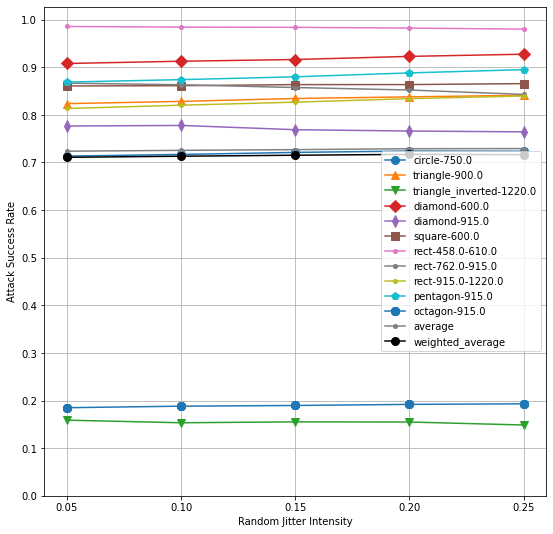

In [11]:
plt.figure(figsize=(9, 9))
markers = ['o', '^', 'v', 'D', 'd', 's', '.', '.', '.', 'p', '8']
for class_label, shape in enumerate(shapes_arr):
    plot_df = synthetic_color_intensity_ablation_results_df[synthetic_color_intensity_ablation_results_df['class_label'] == class_label]
    plt.plot(plot_df['color_intensity'], plot_df['asr'], label=shape, marker=markers[class_label], markersize=8)

mean_grouped_df = synthetic_color_intensity_ablation_results_df.groupby(by=['color_intensity']).mean().reset_index()
plt.plot(mean_grouped_df['color_intensity'], mean_grouped_df['asr'], label='average', marker='.', markersize=8, color='grey')

synthetic_color_intensity_ablation_results_df['class_weight'] = synthetic_color_intensity_ablation_results_df['shape'].map(MAPILLARY_LABEL_COUNTS_DICT)
synthetic_color_intensity_ablation_results_df['asr_x_class_weight'] = synthetic_color_intensity_ablation_results_df['asr'] * synthetic_color_intensity_ablation_results_df['class_weight']

weighted_mean_grouped_df = synthetic_color_intensity_ablation_results_df.groupby(by=['color_intensity']).agg({'asr_x_class_weight': 'sum'}).reset_index()
weighted_mean_grouped_df['asr_x_class_weight'] = weighted_mean_grouped_df['asr_x_class_weight'] / MAPILLARY_NON_OTHER_LABEL_COUNTS

plt.plot(weighted_mean_grouped_df['color_intensity'], weighted_mean_grouped_df['asr_x_class_weight'], label='weighted_average', marker='o', markersize=8, color='black')


plt.xlabel('Random Jitter Intensity')
plt.ylabel('Attack Success Rate')
plt.legend()
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(plot_df['color_intensity'])
plt.grid()

In [28]:
tranposed_df

class,circle-750.0,triangle-900.0,triangle_inverted-1220.0,diamond-600.0,diamond-915.0,square-600.0,rect-458.0-610.0,rect-762.0-915.0,rect-915.0-1220.0,pentagon-915.0,octagon-915.0
fnr_rotation_0,0.050307,0.083551,0.088866,0.034509,0.291060,0.025400,0.143456,0.099705,0.071415,0.027001,0.026109
fnr_rotation_5,0.047209,0.086232,0.108233,0.034239,0.283445,0.024200,0.127385,0.104068,0.058836,0.026032,0.025600
fnr_rotation_10,0.045724,0.091467,0.166921,0.037186,0.278687,0.023800,0.107895,0.128641,0.049195,0.025693,0.025400
fnr_rotation_15,0.047000,0.090881,0.304631,0.053430,0.299021,0.023200,0.095794,0.165380,0.052363,0.026140,0.026800
fnr_rotation_20,0.048229,0.090058,0.446538,0.162296,0.386969,0.028595,0.090682,0.222522,0.075799,0.029342,0.030127
fnr_rotation_25,0.049739,0.102519,0.554769,0.320079,0.485818,0.089247,0.114180,0.292000,0.129735,0.060400,0.041695
fnr_rotation_30,0.052513,0.172052,0.626589,0.432736,0.562373,0.235387,0.211973,0.371063,0.219688,0.182037,0.084719


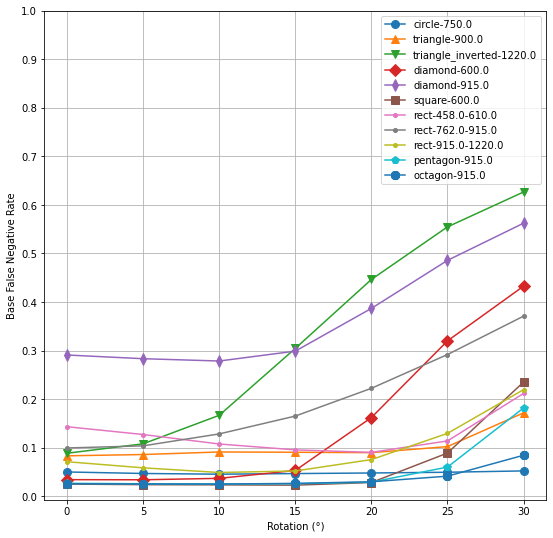

In [30]:
tranposed_df = no_attack_results.set_index('class').transpose()

plt.figure(figsize=(9, 9))
markers = ['o', '^', 'v', 'D', 'd', 's', '.', '.', '.', 'p', '8']
for class_label, shape in enumerate(shapes_arr):
    # plot_df = tranposed_df[[shape]]
    plt.plot([0, 5, 10, 15, 20, 25, 30], tranposed_df[shape].values, label=shape, marker=markers[class_label], markersize=8)

plt.xlabel('Rotation (°)')
plt.ylabel('Base False Negative Rate')
plt.legend()
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.grid()


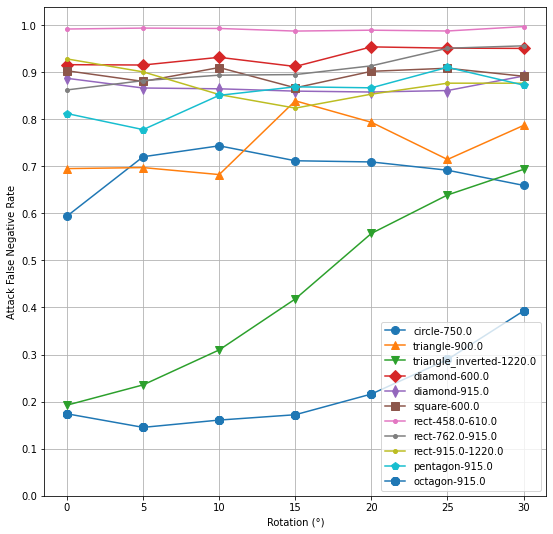

In [31]:
tranposed_df = attack_results.set_index('class').transpose()

plt.figure(figsize=(9, 9))
markers = ['o', '^', 'v', 'D', 'd', 's', '.', '.', '.', 'p', '8']
for class_label, shape in enumerate(shapes_arr):
    # plot_df = tranposed_df[[shape]]
    plt.plot([0, 5, 10, 15, 20, 25, 30], tranposed_df[shape].values, label=shape, marker=markers[class_label], markersize=8)

plt.xlabel('Rotation (°)')
plt.ylabel('Attack False Negative Rate')
plt.legend()
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.grid()
